# **Projeto Integrador III**

#### _Impacto da Poluição do Ar na Incidência de Doenças Respiratórias_

## **Importações**

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## **Analises Doenças**

### _Comparação entre Masculino, Feminino e Total_

In [2]:
# Função para ler o arquivo .txt e retornar os dados em forma de DataFrame
def ler_arquivo(nome_arquivo):
    df = pd.read_csv(nome_arquivo, sep=';', header=None, names=["Doença", "Masculino", "Feminino", "Total"])
    # Remove espaços extras dos nomes das doenças (se existirem)
    df["Doença"] = df["Doença"].str.strip()
    return df

# Função para gerar gráfico individual por mês usando Plotly
def grafico_individual(df, mes):
    df['Total Calculado'] = df['Masculino'] + df['Feminino']

    df_melted = df.melt(
        id_vars='Doença',
        value_vars=['Masculino', 'Feminino', 'Total Calculado'],
        var_name='Sexo',
        value_name='Número de Casos'
    )

    # Cores personalizadas para cada categoria
    cores_personalizadas = {
        "Masculino": "#189AB4",
        "Feminino": "#FD49A0",
        "Total Calculado": "#FAD02C"
    }

    fig = px.bar(
        df_melted,
        x='Doença',
        y='Número de Casos',
        color='Sexo',
        barmode='group',
        title=f"Comparação entre Masculino, Feminino e Total - {mes}",
        color_discrete_map=cores_personalizadas
    )

    fig.update_layout(
        xaxis_tickangle=-45,
        xaxis_title="Doenças",
        yaxis_title="Número de Casos",
        title_font_size=16,
        margin=dict(t=60, l=20, r=20, b=60)
    )

    fig.show()

# Lendo os arquivos
df_jan = ler_arquivo('dados_doencas_jan.txt')
df_fev = ler_arquivo('dados_doencas_fev.txt')
df_mar = ler_arquivo('dados_doencas_mar.txt')

# Gerando os gráficos
grafico_individual(df_jan, "Janeiro 2025")
grafico_individual(df_fev, "Fevereiro 2025")
grafico_individual(df_mar, "Março 2025")


### _Comparativo de Custo Médio por Doença_

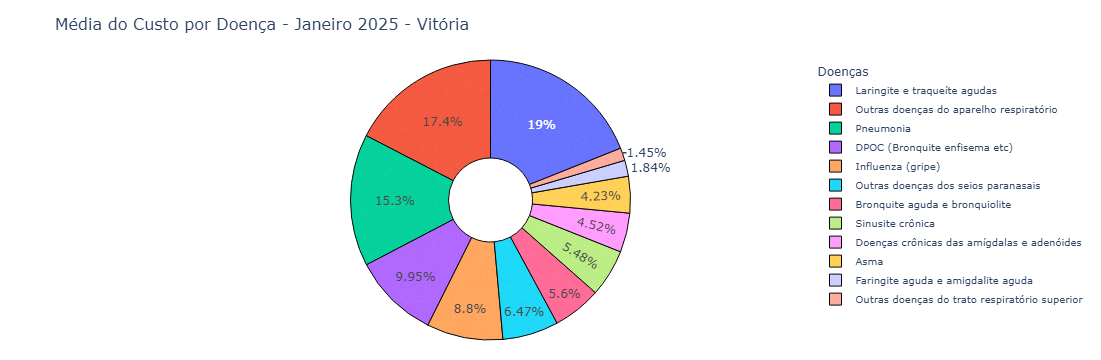

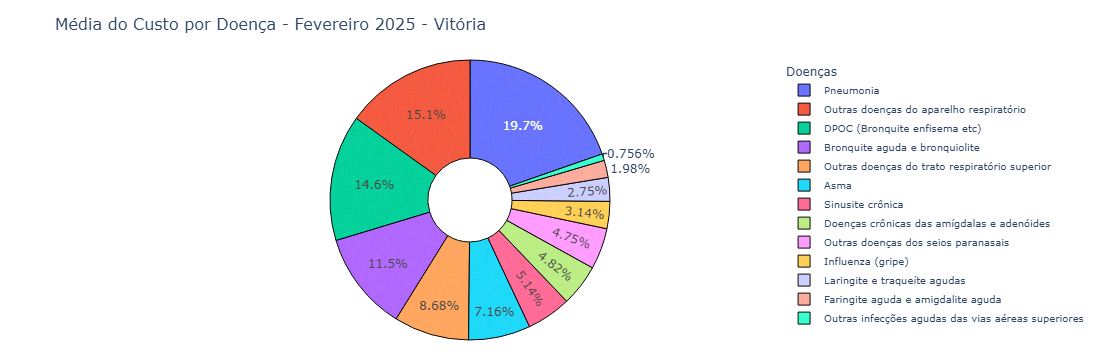

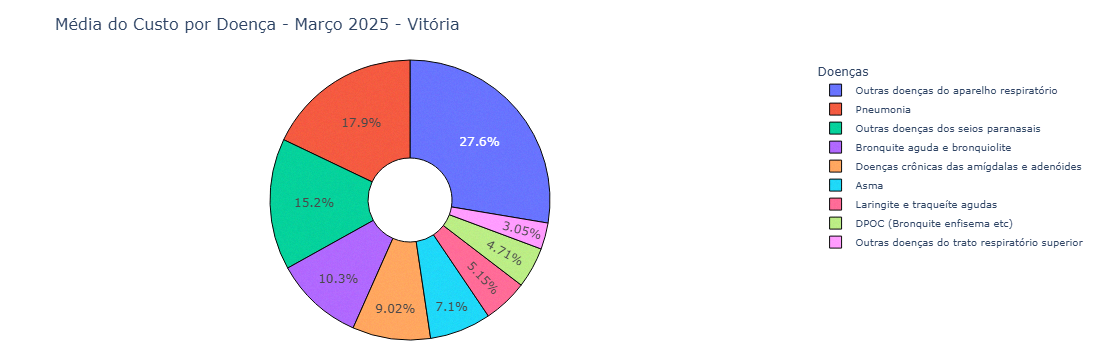

In [5]:
def ler_arquivo(nome_arquivo):
    try:
        df = pd.read_csv(nome_arquivo, sep=';', header=None, names=["Doença", "Custo Médio"])
        df["Doença"] = df["Doença"].astype(str).str.strip()
        df["Custo Médio"] = pd.to_numeric(df["Custo Médio"].astype(str).str.replace(",", "."), errors="coerce")
        df = df[df["Custo Médio"].notna() & (df["Custo Médio"] > 0)]

        if df.empty:
            print(f"Aviso: Nenhum dado válido encontrado em '{nome_arquivo}'.")
            return None
        return df

    except Exception as e:
        print(f"Erro ao processar '{nome_arquivo}': {e}")
        return None

# Função para gerar gráfico de pizza com porcentagem dentro e legenda lateral
def grafico_pizza(df, mes):
    if df is None or df.empty:
        print(f"Dados inválidos ou vazios para {mes}.")
        return

    fig = go.Figure(data=[go.Pie(
        labels=df["Doença"],
        values=df["Custo Médio"],
        hole=0.3,
        textinfo='percent',  # Mostra apenas porcentagem dentro do gráfico
        textfont_size=12,
        marker=dict(line=dict(color='#000000', width=1))
    )])

    fig.update_layout(
        title=f"Média do Custo por Doença - {mes} 2025 - Vitória",
        title_font_size=16,
        legend_title="Doenças",
        legend=dict(font_size=10),
        margin=dict(t=60, l=20, r=20, b=20)
    )

    fig.show()

df_jan = ler_arquivo("custo_medio_int_jan.txt")
df_fev = ler_arquivo("custo_medio_int_fev.txt")
df_mar = ler_arquivo("custo_medio_int_mar.txt")

grafico_pizza(df_jan, "Janeiro")
grafico_pizza(df_fev, "Fevereiro")
grafico_pizza(df_mar, "Março")

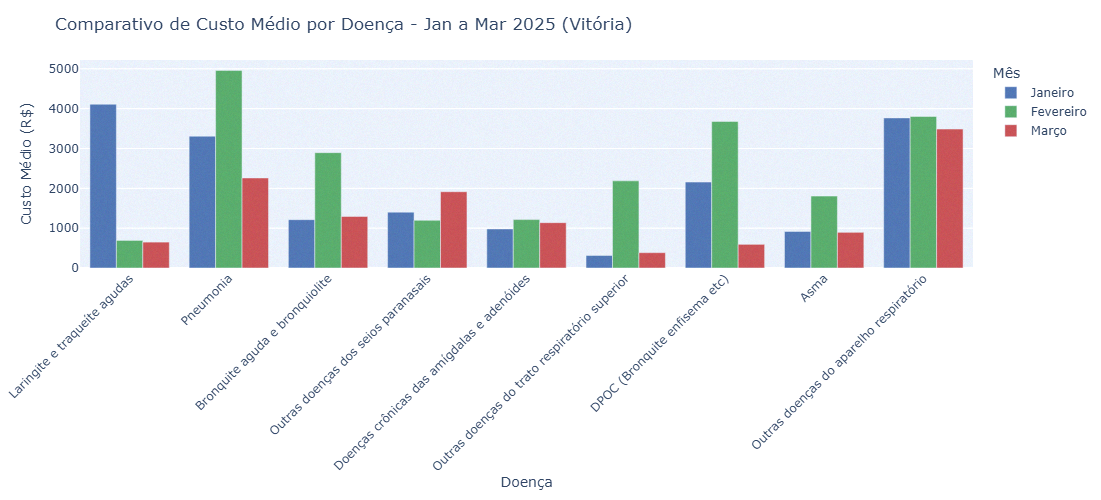

In [6]:
def grafico_comparativo_trimestral(df_jan, df_fev, df_mar):
    if df_jan is None or df_fev is None or df_mar is None:
        print("Um dos meses não possui dados válidos.")
        return

    # Renomear colunas para combinar os DataFrames
    df_jan = df_jan.rename(columns={"Custo Médio": "Janeiro"})
    df_fev = df_fev.rename(columns={"Custo Médio": "Fevereiro"})
    df_mar = df_mar.rename(columns={"Custo Médio": "Março"})

    # Juntar os dados em um único DataFrame
    df_total = pd.merge(df_jan, df_fev, on="Doença", how="inner")
    df_total = pd.merge(df_total, df_mar, on="Doença", how="inner")

    # Criação do gráfico de barras com Plotly
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_total["Doença"],
        y=df_total["Janeiro"],
        name="Janeiro",
        marker_color="#4c72b0"
    ))

    fig.add_trace(go.Bar(
        x=df_total["Doença"],
        y=df_total["Fevereiro"],
        name="Fevereiro",
        marker_color="#55a868"
    ))

    fig.add_trace(go.Bar(
        x=df_total["Doença"],
        y=df_total["Março"],
        name="Março",
        marker_color="#c44e52"
    ))

    # Layout
    fig.update_layout(
        barmode='group',
        title="Comparativo de Custo Médio por Doença - Jan a Mar 2025 (Vitória)",
        xaxis_title="Doença",
        yaxis_title="Custo Médio (R$)",
        xaxis_tickangle=-45,
        legend_title="Mês",
        margin=dict(t=60, b=100),
        height=500
    )

    fig.show()

# Chamada da função
grafico_comparativo_trimestral(df_jan, df_fev, df_mar)